In [1]:
#Setup conections to repo
import geopandas as gpd
url = "https://github.com/meade68/DACSS_690D_Week13_HW3/raw/refs/heads/main/DATA/tl_2020_19_bg.zip"
IA_TRACTS = gpd.read_file(url)
url = "https://github.com/meade68/DACSS_690D_Week13_HW3/raw/refs/heads/main/DATA/DECENNIALDHC2020.H3_2025-12-10T220427/DECENNIALDHC2020.H3-Data.csv"
IA_DATA= gpd.read_file(url)


C:\Users\meade\anaconda3\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,19,147,960300,4,191479603004,Block Group 4,G5030,S,9863278,93562,+43.1115380,-094.6578724,"POLYGON ((-94.6789 43.1152, -94.67864 43.1154,..."
1,19,147,960400,2,191479604002,Block Group 2,G5030,S,358070485,9562564,+43.0896933,-094.8453779,"POLYGON ((-94.91391 42.91864, -94.9139 42.9195..."
2,19,129,040100,4,191290401004,Block Group 4,G5030,S,27394633,0,+41.0022706,-095.5983260,"POLYGON ((-95.63293 41.00893, -95.63164 41.008..."
3,19,163,010401,1,191630104011,Block Group 1,G5030,S,49459275,0,+41.5522588,-090.7504067,"POLYGON ((-90.78506 41.51265, -90.78505 41.512..."
4,19,163,010401,2,191630104012,Block Group 2,G5030,S,1226261,0,+41.5893680,-090.7792075,"POLYGON ((-90.78389 41.59052, -90.78388 41.590..."


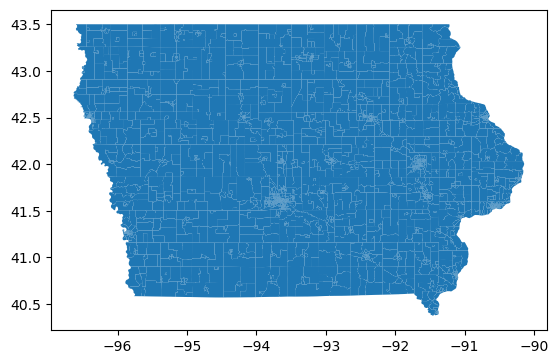

In [2]:
IA_TRACTS.plot()
IA_TRACTS.head()

In [3]:
IA_DATA.head()

,GEO_ID,NAME,H3_001N,H3_002N,H3_003N,field_6
0,Geography,Geographic Area Name,!!Total:,!!Total:!!Occupied,!!Total:!!Vacant,
1,1500000US190019601001,Block Group 1; Census Tract 9601; Adair County...,632,540,92,
2,1500000US190019601002,Block Group 2; Census Tract 9601; Adair County...,273,253,20,
3,1500000US190019601003,Block Group 3; Census Tract 9601; Adair County...,398,363,35,
4,1500000US190019602001,Block Group 1; Census Tract 9602; Adair County...,258,236,22,


In [4]:
#Drop original column  names. Rename the column names
IA_DATA = IA_DATA.iloc[1:].reset_index(drop=True)
IA_DATA = IA_DATA.iloc[:, :5]
IA_DATA.columns = ["Geography","Geographic Area Name",	"Total",	"Occupied",	"Vacant"]
IA_DATA.columns

Index(['Geography', 'Geographic Area Name', 'Total', 'Occupied', 'Vacant'], dtype='object')

In [5]:
#Trim/replace the first part of the string 
IA_DATA["Geography"] = IA_DATA["Geography"].str.replace("1500000US", "", regex=False)
IA_DATA.head()

,Geography,Geographic Area Name,Total,Occupied,Vacant
0,190019601001,Block Group 1; Census Tract 9601; Adair County...,632,540,92
1,190019601002,Block Group 2; Census Tract 9601; Adair County...,273,253,20
2,190019601003,Block Group 3; Census Tract 9601; Adair County...,398,363,35
3,190019602001,Block Group 1; Census Tract 9602; Adair County...,258,236,22
4,190019602002,Block Group 2; Census Tract 9602; Adair County...,543,468,75


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Geography,Geographic Area Name,Total,Occupied,Vacant
0,19,147,960300,4,191479603004,Block Group 4,G5030,S,9863278,93562,+43.1115380,-094.6578724,"POLYGON ((-94.6789 43.1152, -94.67864 43.1154,...",191479603004,Block Group 4; Census Tract 9603; Palo Alto Co...,624,526,98
1,19,147,960400,2,191479604002,Block Group 2,G5030,S,358070485,9562564,+43.0896933,-094.8453779,"POLYGON ((-94.91391 42.91864, -94.9139 42.9195...",191479604002,Block Group 2; Census Tract 9604; Palo Alto Co...,523,336,187
2,19,129,040100,4,191290401004,Block Group 4,G5030,S,27394633,0,+41.0022706,-095.5983260,"POLYGON ((-95.63293 41.00893, -95.63164 41.008...",191290401004,Block Group 4; Census Tract 401; Mills County;...,526,469,57
3,19,163,010401,1,191630104011,Block Group 1,G5030,S,49459275,0,+41.5522588,-090.7504067,"POLYGON ((-90.78506 41.51265, -90.78505 41.512...",191630104011,Block Group 1; Census Tract 104.01; Scott Coun...,428,405,23
4,19,163,010401,2,191630104012,Block Group 2,G5030,S,1226261,0,+41.5893680,-090.7792075,"POLYGON ((-90.78389 41.59052, -90.78388 41.590...",191630104012,Block Group 2; Census Tract 104.01; Scott Coun...,394,364,30


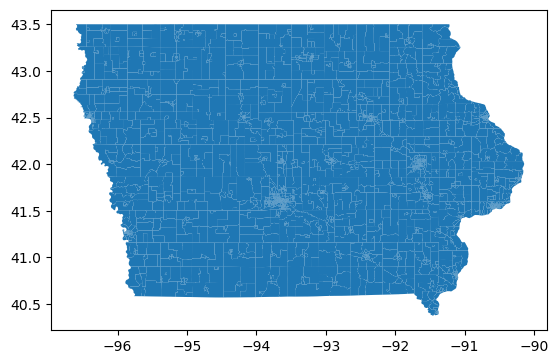

In [6]:
IA_MERGED = IA_TRACTS.merge(IA_DATA, left_on="GEOID", right_on="Geography", how="inner")
IA_MERGED.plot()
IA_MERGED.head()

In [7]:

#calculate percentage vacant
import numpy as np
import pandas as pd

IA_MERGED["Vacant"] = pd.to_numeric(IA_MERGED["Vacant"], errors="coerce")
IA_MERGED["Total"]  = pd.to_numeric(IA_MERGED["Total"], errors="coerce")

IA_MERGED["PCT_VACANT"] = IA_MERGED["Vacant"] / IA_MERGED["Total"] * 100

IA_MERGED["PCT_VACANT"] = IA_MERGED["PCT_VACANT"].fillna(0)

In [8]:
IA_MERGED.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Geography,Geographic Area Name,Total,Occupied,Vacant,PCT_VACANT
0,19,147,960300,4,191479603004,Block Group 4,G5030,S,9863278,93562,+43.1115380,-094.6578724,"POLYGON ((-94.6789 43.1152, -94.67864 43.1154,...",191479603004,Block Group 4; Census Tract 9603; Palo Alto Co...,624,526,98,15.705128
1,19,147,960400,2,191479604002,Block Group 2,G5030,S,358070485,9562564,+43.0896933,-094.8453779,"POLYGON ((-94.91391 42.91864, -94.9139 42.9195...",191479604002,Block Group 2; Census Tract 9604; Palo Alto Co...,523,336,187,35.755258
2,19,129,040100,4,191290401004,Block Group 4,G5030,S,27394633,0,+41.0022706,-095.5983260,"POLYGON ((-95.63293 41.00893, -95.63164 41.008...",191290401004,Block Group 4; Census Tract 401; Mills County;...,526,469,57,10.836502
3,19,163,010401,1,191630104011,Block Group 1,G5030,S,49459275,0,+41.5522588,-090.7504067,"POLYGON ((-90.78506 41.51265, -90.78505 41.512...",191630104011,Block Group 1; Census Tract 104.01; Scott Coun...,428,405,23,5.373832
4,19,163,010401,2,191630104012,Block Group 2,G5030,S,1226261,0,+41.5893680,-090.7792075,"POLYGON ((-90.78389 41.59052, -90.78388 41.590...",191630104012,Block Group 2; Census Tract 104.01; Scott Coun...,394,364,30,7.614213


In [9]:
#
DisMap=IA_MERGED.copy()

In [10]:
from libpysal.graph import Graph

DisMap_adjaceny=Graph.build_contiguity(DisMap)
DisMap_adjaceny.isolates

Index([], dtype='int64', name='focal')

In [11]:
DisMap.drop(index=DisMap_adjaceny.isolates,inplace=True)
DisMap.reset_index(drop=True,inplace=True)

In [13]:
#check CRS
DisMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [15]:
selected_variables = ['PCT_VACANT']
DisMap[selected_variables].describe()

,PCT_VACANT
count,2703.000000
mean,8.900042
std,6.476581
min,0.000000
25%,5.186253
50%,7.675195
75%,11.011236
max,74.932372


<Axes: >

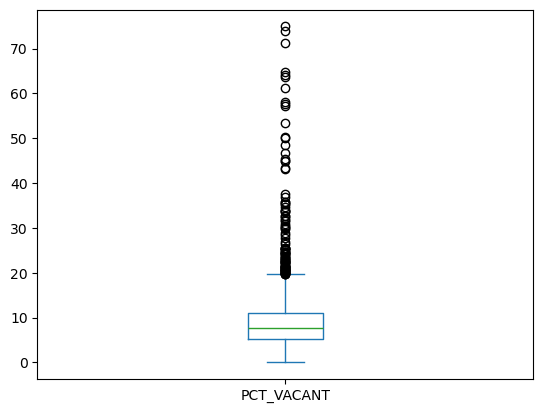

In [22]:
DisMap[selected_variables].plot(kind='box')

OOf.

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import median_abs_deviation as mad

# --- Function to Perform Robust Standardization (Z-score via Median and MAD) ---
def robust_score(series):
    # 1. Calculate the Median
    median_val = series.median()
    # 2. Calculate the Median Absolute Deviation (MAD)
    mad_val = mad(series, scale='normal') #for comparability with Zs
    # 3. Apply the Robust Formula
    return (series - median_val) / mad_val

In [20]:
deficit_cols = ['PCT_VACANT']

clusterNames=['Vacant_Housing']
DisMap[clusterNames]=DisMap[deficit_cols].apply(robust_score)
DisMap[clusterNames]

,Vacant_Housing
0,1.932388
1,6.757415
2,0.760763
3,-0.553819
4,-0.014675
...,...
2698,-0.046552
2699,-0.582001
2700,-0.471889
2701,0.369897


In [25]:
import numpy
RANDOM_SEED = 12345
numpy.random.seed(RANDOM_SEED)

from sklearn.cluster import KMeans

K_target = 5

# as simple as:
DisMap['deficit_k5'] = KMeans(n_clusters=K_target,random_state=RANDOM_SEED).fit_predict(DisMap[clusterNames])

In [26]:
DisMap.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,INTPTLON,geometry,Geography,Geographic Area Name,Total,Occupied,Vacant,PCT_VACANT,Vacant_Housing,deficit_k5
0,19,147,960300,4,191479603004,Block Group 4,G5030,S,9863278,93562,...,-094.6578724,"POLYGON ((-94.6789 43.1152, -94.67864 43.1154,...",191479603004,Block Group 4; Census Tract 9603; Palo Alto Co...,624,526,98,15.705128,1.932388,4
1,19,147,960400,2,191479604002,Block Group 2,G5030,S,358070485,9562564,...,-094.8453779,"POLYGON ((-94.91391 42.91864, -94.9139 42.9195...",191479604002,Block Group 2; Census Tract 9604; Palo Alto Co...,523,336,187,35.755258,6.757415,3
2,19,129,040100,4,191290401004,Block Group 4,G5030,S,27394633,0,...,-095.5983260,"POLYGON ((-95.63293 41.00893, -95.63164 41.008...",191290401004,Block Group 4; Census Tract 401; Mills County;...,526,469,57,10.836502,0.760763,1
3,19,163,010401,1,191630104011,Block Group 1,G5030,S,49459275,0,...,-090.7504067,"POLYGON ((-90.78506 41.51265, -90.78505 41.512...",191630104011,Block Group 1; Census Tract 104.01; Scott Coun...,428,405,23,5.373832,-0.553819,0
4,19,163,010401,2,191630104012,Block Group 2,G5030,S,1226261,0,...,-090.7792075,"POLYGON ((-90.78389 41.59052, -90.78388 41.590...",191630104012,Block Group 2; Census Tract 104.01; Scott Coun...,394,364,30,7.614213,-0.014675,1


In [27]:
# see distribution of districts
DisMap["deficit_k5"].value_counts()

deficit_k5
1    1087
0    1041
4     487
3      68
2      20
Name: count, dtype: int64

In [29]:
# for most cases except spatial kmeans
IA_perim_graph = Graph.build_contiguity(DisMap, by_perimeter=True)
IA_perim_graph=IA_perim_graph.transform("r")

# for spatial kmeans
from libpysal.weights import W # Import W for the conversion
IA_perim = IA_perim_graph.to_W()
IA_perim.transform = "r"

In [31]:
type(IA_perim_graph),type(IA_perim)

(libpysal.graph.base.Graph, libpysal.weights.weights.W)

In [32]:
from spopt.region import RegionKMeansHeuristic as RKMeans

RKMeans_model = RKMeans(data=DisMap[clusterNames].values, 
                        n_clusters=K_target,
                        seed=RANDOM_SEED,
                        w=IA_perim,drop_islands=True)
# computing
RKMeans_model.solve()

In [33]:
#add the column
DisMap['deficit_k5R'] = RKMeans_model.labels_
DisMap["deficit_k5R"].value_counts()

deficit_k5R
2    737
1    677
3    562
4    404
0    323
Name: count, dtype: int64

In [34]:
from spopt.region import AZP

azp_model = AZP(
    gdf=DisMap,
    w=IA_perim_graph,
    attrs_name=clusterNames,
    n_clusters=K_target,
    random_state=RANDOM_SEED)
# computing
azp_model.solve()

In [35]:
#Add the columns
DisMap['deficit_azpR'] = azp_model.labels_
DisMap["deficit_azpR"].value_counts()

deficit_azpR
2.0    985
0.0    811
1.0    369
3.0    300
4.0    238
Name: count, dtype: int64

In [36]:
from spopt.region import Skater

skater_model = Skater(
    gdf=DisMap,
    w=IA_perim_graph,
    attrs_name=clusterNames,
    n_clusters=K_target
)
# computing
skater_model.solve()


DisMap['deficit_skaterR'] = skater_model.labels_
DisMap["deficit_azpR"].value_counts()

deficit_azpR
2.0    985
0.0    811
1.0    369
3.0    300
4.0    238
Name: count, dtype: int64

In [37]:
from esda import shape as compactness

# columns with cluster labels
cluster_types_to_evaluate = ["deficit_k5","deficit_k5R","deficit_azpR","deficit_skaterR"]

# List to store the results
means_IPQCHR = [] 

for cluster_type in cluster_types_to_evaluate:
    # 1.disolving for both
    regions = DisMap[[cluster_type, "geometry"]].dissolve(by=cluster_type) 
    
    # 2. Compute IPQ and CHR (at the dissolved regions level)
    ipqs = compactness.isoperimetric_quotient(regions)
    chullr = compactness.convex_hull_ratio(regions)

    # 3. Append the means to 'means_IPQCHR'
    means_IPQCHR.append((cluster_type, ipqs.mean(), chullr.mean()))

# Re-arrange the scores into a dataframe for display
colNames = ["cluster type", "Mean IPQ", "Mean CHR"]
comparisson_geo = pd.DataFrame(means_IPQCHR, columns=colNames).set_index("cluster type")

In [38]:
from sklearn import metrics

scores_CHSIL = []

for cluster_type in cluster_types_to_evaluate:
    ch_score = metrics.calinski_harabasz_score(
        DisMap[clusterNames],# using scaled variables
        DisMap[cluster_type])# using these labels
    sil_score = metrics.silhouette_score(
        DisMap[clusterNames],DisMap[cluster_type]) #same as above
    
    # appending 
    scores_CHSIL.append((cluster_type, ch_score,sil_score))


# re-arrange the scores into a dataframe for display
colNames=["cluster type", "CH score", "SIL score"]
comparisson_stat=pd.DataFrame(scores_CHSIL, columns=colNames).set_index("cluster type")

In [39]:
# Concatenate the two DataFrames column-wise (axis=1)
combined_df = pd.concat([comparisson_geo,comparisson_stat],axis=1)

### Define the two levels of the column MultiIndex

# Level 0 (Top Header): Groups the metrics
top_level = ['Geo Coherence'] * 2 + ['Stat Coherence'] * 2
# Level 1 (Metric Name): The original column names
bottom_level = combined_df.columns.tolist() 

# Create the MultiIndex
combined_df.columns = pd.MultiIndex.from_arrays([top_level, bottom_level])

# Display the resulting DataFrame
combined_df

Geo Coherence           Stat Coherence          
                     Mean IPQ  Mean CHR       CH score SIL score
cluster type                                                    
deficit_k5           0.015911  0.194762    6426.781533  0.545091
deficit_k5R          0.051009  0.547106      50.784286 -0.159557
deficit_azpR         0.043794  0.483128     125.108221 -0.143232
deficit_skaterR      0.269002  0.753495     207.166686  0.046584

In [40]:
DisMap.groupby("deficit_k5")[clusterNames].mean()

,Vacant_Housing
deficit_k5,
0,-0.804327
1,0.261563
2,11.598985
3,4.516669
4,1.664477


In [46]:
DisMap.groupby("deficit_skaterR")[clusterNames].mean()

,Vacant_Housing
deficit_skaterR,
0,1.427049
1,0.124821
2,0.753528
3,1.551155
4,14.417064


In [43]:
DisMap.head(20)

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,Geographic Area Name,Total,Occupied,Vacant,PCT_VACANT,Vacant_Housing,deficit_k5,deficit_k5R,deficit_azpR,deficit_skaterR
0,19,147,960300,4,191479603004,Block Group 4,G5030,S,9863278,93562,...,Block Group 4; Census Tract 9603; Palo Alto Co...,624,526,98,15.705128,1.932388,4,2,1.0,0
1,19,147,960400,2,191479604002,Block Group 2,G5030,S,358070485,9562564,...,Block Group 2; Census Tract 9604; Palo Alto Co...,523,336,187,35.755258,6.757415,3,2,1.0,0
2,19,129,040100,4,191290401004,Block Group 4,G5030,S,27394633,0,...,Block Group 4; Census Tract 401; Mills County;...,526,469,57,10.836502,0.760763,1,2,2.0,1
3,19,163,010401,1,191630104011,Block Group 1,G5030,S,49459275,0,...,Block Group 1; Census Tract 104.01; Scott Coun...,428,405,23,5.373832,-0.553819,0,1,2.0,1
4,19,163,010401,2,191630104012,Block Group 2,G5030,S,1226261,0,...,Block Group 2; Census Tract 104.01; Scott Coun...,394,364,30,7.614213,-0.014675,1,3,2.0,1
5,19,163,012501,1,191630125011,Block Group 1,G5030,S,2733376,0,...,Block Group 1; Census Tract 125.01; Scott Coun...,811,787,24,2.959309,-1.134869,0,1,2.0,1
6,19,163,010402,2,191630104022,Block Group 2,G5030,S,21964559,49781,...,Block Group 2; Census Tract 104.02; Scott Coun...,469,438,31,6.609808,-0.256383,1,1,2.0,1
7,19,163,010401,3,191630104013,Block Group 3,G5030,S,13585769,62374,...,Block Group 3; Census Tract 104.01; Scott Coun...,846,818,28,3.309693,-1.050550,0,1,2.0,1
8,19,163,012802,2,191630128022,Block Group 2,G5030,S,1927005,0,...,Block Group 2; Census Tract 128.02; Scott Coun...,835,688,147,17.604790,2.389539,4,1,0.0,1
9,19,007,950500,2,190079505002,Block Group 2,G5030,S,269778248,230814,...,Block Group 2; Census Tract 9505; Appanoose Co...,565,496,69,12.212389,1.091867,4,2,0.0,2


In [50]:
kmeans_labels = {
    0: '1.Lowest Housing Vacancy Rate',
    1: '2.Highest Housing Vacancy Rate',
    2: '5.',
    3: '3.',
    4: '4.'
}

skater_labels = {
    0: '3.Lowest Housing Vacancy Rate',
    1: '1.',
    2: '2.',
    3: '4.',
    4: '5.Highest Housing Vacancy Rate'
}

DisMap['deficit_k5_labels'] = DisMap['deficit_k5'].map(kmeans_labels)
DisMap['deficit_skaterR_labels'] = DisMap['deficit_skaterR'].map(skater_labels)


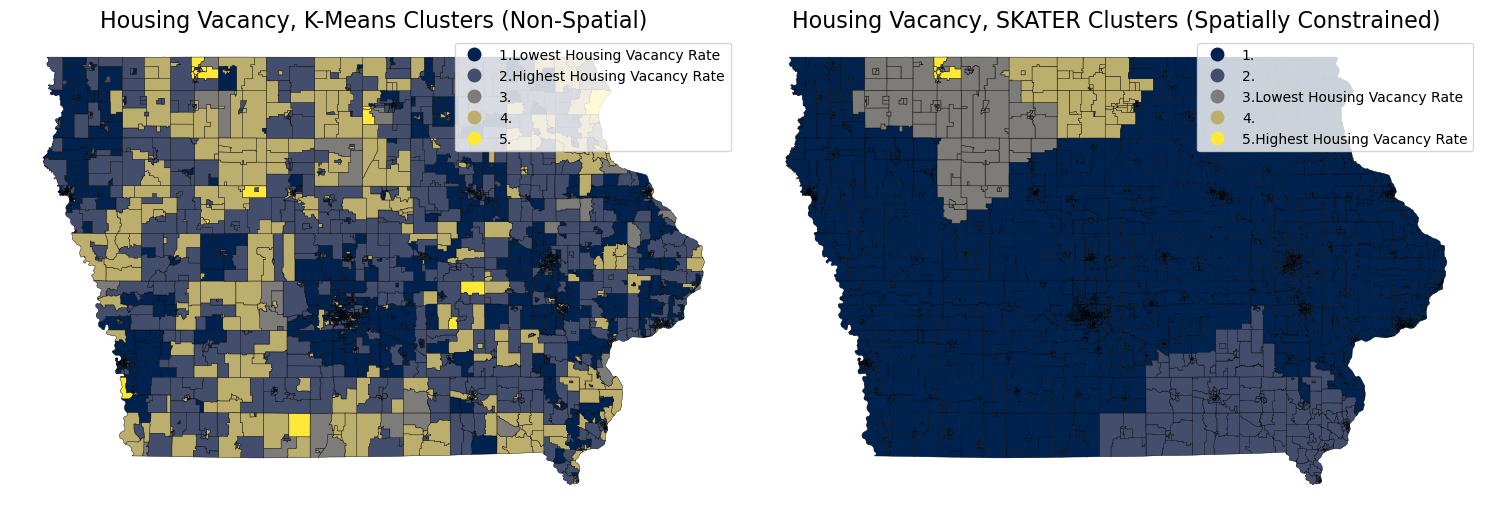

In [58]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 12))

# K-Means map
DisMap.plot(
    column='deficit_k5_labels',
    cmap='cividis',
    categorical=True,
    legend=True,
    edgecolor='black',
    linewidth=0.3,
    ax=axes[0]
)
axes[0].set_title('Housing Vacancy, K-Means Clusters (Non-Spatial)', fontsize=16)
axes[0].set_axis_off()

# SKATER map
DisMap.plot(
    column='deficit_skaterR_labels',
    cmap='cividis',
    categorical=True,
    legend=True,
    edgecolor='black',
    linewidth=0.3,
    ax=axes[1]
)
axes[1].set_title('Housing Vacancy, SKATER Clusters (Spatially Constrained)', fontsize=16)
axes[1].set_axis_off()

plt.tight_layout()
fig.savefig("maps.png", dpi=300, bbox_inches="tight")
plt.show()

In [56]:
print(map1)

Axes(0.01,0.304022;0.485x0.391957)
